In [72]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [73]:
# Loading the data (from Jan 2009 to December 2020)
data = pd.read_csv('Tourism.csv', delimiter=';', header=1)

In [74]:
data.head(5)

,Year,Month,Canton,Visitors' country of residence - total Arrivals,Switzerland Arrivals,Baltic States Arrivals,Germany Arrivals,France Arrivals,Italy Arrivals,Austria Arrivals,...,United Arab Emirates Arrivals,Serbia and Montenegro Arrivals,Croatia Arrivals,Romania Arrivals,Russia Arrivals,Slovakia Arrivals,Slovenia Arrivals,Czechia Arrivals,Ukraine Arrivals,Serbia Arrivals
0,2009,January,Switzerland,1064111,528523,1250,154530,44363,38939,10142,...,...,919,963,1955,21566,644,638,1885,2623,...
1,2009,February,Switzerland,1089483,521069,864,160914,59787,35721,10615,...,...,779,728,1657,9881,920,595,2435,1328,...
2,2009,March,Switzerland,1196859,567431,1290,187297,55015,43895,14476,...,...,964,965,2010,13485,1123,780,3676,1839,...
3,2009,April,Switzerland,1045137,468308,1671,164642,48102,38747,13328,...,...,916,1010,1750,9139,1491,1073,3029,1341,...
4,2009,May,Switzerland,1214666,548389,1120,183987,52869,40187,16379,...,...,919,903,1638,13502,1014,847,3823,1690,...


In [75]:
#Reindexing
data.index = pd.date_range('2009-01-01', '2020-12-01', freq= 'MS')

In [76]:
#Drop useless columns
data = data.drop(['Year', 'Month', 'Canton'], axis = 1)

In [77]:
#Replacing '...' values by 0 and Converting arrival string values into integer values
for column in data.columns:
    data[column] = data[column].apply(lambda x : 0 if x == '...' else float(x))

In [78]:
data.head(5)

,Visitors' country of residence - total Arrivals,Switzerland Arrivals,Baltic States Arrivals,Germany Arrivals,France Arrivals,Italy Arrivals,Austria Arrivals,United Kingdom Arrivals,Irland Arrivals,Netherlands Arrivals,...,United Arab Emirates Arrivals,Serbia and Montenegro Arrivals,Croatia Arrivals,Romania Arrivals,Russia Arrivals,Slovakia Arrivals,Slovenia Arrivals,Czechia Arrivals,Ukraine Arrivals,Serbia Arrivals
2009-01-01,1064111.0,528523.0,1250.0,154530.0,44363.0,38939.0,10142.0,53636.0,2662.0,20687.0,...,0.0,919.0,963.0,1955.0,21566.0,644.0,638.0,1885.0,2623.0,0.0
2009-02-01,1089483.0,521069.0,864.0,160914.0,59787.0,35721.0,10615.0,65594.0,2880.0,39239.0,...,0.0,779.0,728.0,1657.0,9881.0,920.0,595.0,2435.0,1328.0,0.0
2009-03-01,1196859.0,567431.0,1290.0,187297.0,55015.0,43895.0,14476.0,61323.0,2744.0,24138.0,...,0.0,964.0,965.0,2010.0,13485.0,1123.0,780.0,3676.0,1839.0,0.0
2009-04-01,1045137.0,468308.0,1671.0,164642.0,48102.0,38747.0,13328.0,48590.0,2446.0,20859.0,...,0.0,916.0,1010.0,1750.0,9139.0,1491.0,1073.0,3029.0,1341.0,0.0
2009-05-01,1214666.0,548389.0,1120.0,183987.0,52869.0,40187.0,16379.0,51515.0,2253.0,25541.0,...,0.0,919.0,903.0,1638.0,13502.0,1014.0,847.0,3823.0,1690.0,0.0


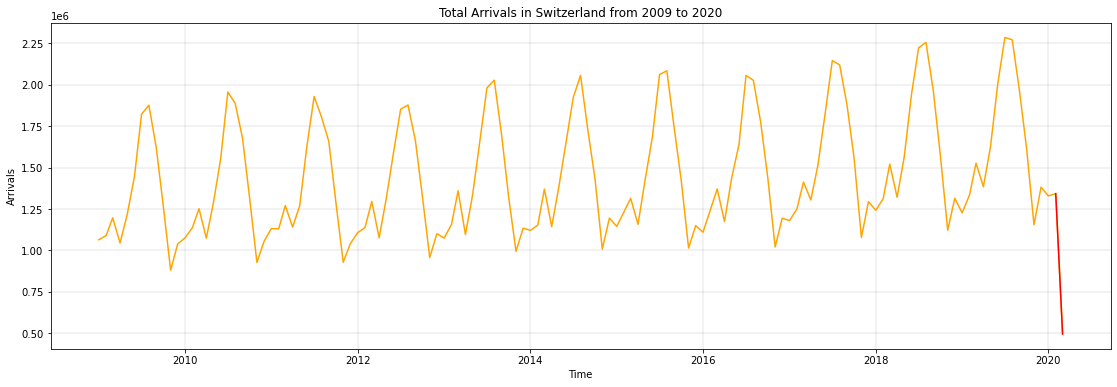

In [79]:
#Plot total number of Arrivals from Jan 2009 to March 2020 (Lockdown in Switzerland)
plt.figure(figsize= (19,6 ))
plt.plot(data[:datetime(2020,3,1)].index, data["Visitors' country of residence - total Arrivals"][:datetime(2020,3,1)], color = 'orange')
plt.plot(data[datetime(2020,2,1):datetime(2020,3,1)].index, data["Visitors' country of residence - total Arrivals"][datetime(2020,2,1):datetime(2020,3,1)], color = 'r')
plt.title('Total Arrivals in Switzerland from 2009 to 2020')
plt.xlabel('Time')
plt.ylabel('Arrivals')
plt.grid(color='k', linestyle='-', linewidth=0.1)
plt.show()

## AR Base Modelisation

/Users/Clement/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


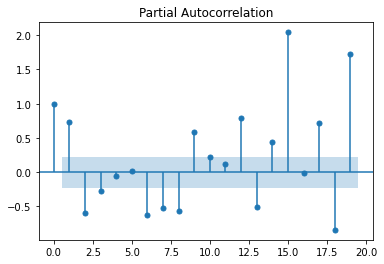

In [80]:
#Covid crisis for our testSet
start_date_testing = datetime(2015,3,1)
end_date_testing = datetime(2020,10,1)

Arrivals = pd.DataFrame(data["Visitors' country of residence - total Arrivals"])
Arrivals = Arrivals.rename(columns = {"Visitors' country of residence - total Arrivals": 'Total Arrivals'}, inplace = False)
#Arrivals['Total Arrivals'] = Arrivals['Total Arrivals'].apply(lambda x : np.log(x) if x>0 else 0)

pacf = plot_pacf(Arrivals['Total Arrivals'][:start_date_testing])

ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values: it describes how well the present value of the series is related with its past values.


PACF is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation. For example, if we are regressing a variable Y on other variables X1, X2, and X3, the partial correlation between Y and X3 is the amount of correlation between Y and X3 that is not explained by their common correlations with X1 and X2.

We observe a significant partial correlation with variables in delays list below

In [87]:
lags = ['t-1', 't-2','t-12', 't-15', 't-17', 't-18', 't-19']

for i, lag in enumerate(lags):
    Arrivals[lag] = Arrivals['Total Arrivals'].shift(i+1)

Arrivals = Arrivals.dropna(axis=0)

In [88]:
Arrivals.head(3)

,Total Arrivals,t-1,t-2,t-12,t-15,t-17,t-18,t-19,Switzerland_Hotels_Trend
2010-08-01,1887475.0,1955557.0,1556381.0,1287452.0,1074035.0,1251923.0,1136889.0,1075731.0,94
2010-09-01,1677924.0,1887475.0,1955557.0,1556381.0,1287452.0,1074035.0,1251923.0,1136889.0,85
2010-10-01,1317370.0,1677924.0,1887475.0,1955557.0,1556381.0,1287452.0,1074035.0,1251923.0,78


In [89]:
True_Arrivals = Arrivals['Total Arrivals'][start_date_testing : end_date_testing]

In [90]:
Hotels = pd.read_csv('Hotel.csv', header = 1, index_col= 'Mois', parse_dates=[0], date_parser = lambda x : datetime.strptime(x, '%Y-%m'))
Hotels = Hotels.rename(columns = {'Hotel: (Suisse)' : 'Switzerland_Hotels_Trend'})

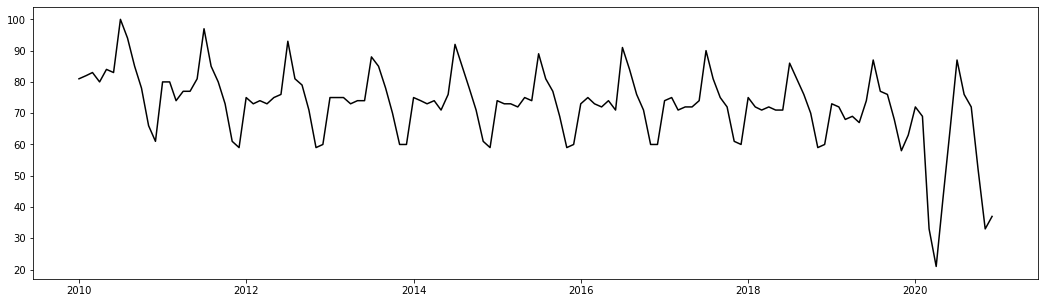

In [91]:
#Hotel plot
fig,axes = plt.subplots(figsize=(18,5))
axes.plot(Hotels, label = 'Actual',color = 'k')

In [92]:
Arrivals = pd.merge(Arrivals, Hotels, right_index = True, left_index=True)

In [93]:
#Implementation of the Linear Regression model with or without the Google Trends features, with a training window increasing at every iteration

def Auto_Regressive_Model(True_Labels, end_date_testing, dataset, lags, trends, with_trends=False):
    
    Arrivals_Predictions = True_Labels.copy()

    if (with_trends):
        lags.extend(trends)
        
    for train_last in True_Arrivals.index:
        train = dataset[ :train_last -timedelta(days=1)]
        test = dataset[train_last : end_date_testing]
        
        X_train = train[lags].values
        X_test = test[lags].values
        
            
        y_train = train['Total Arrivals'].values
        y_test = test['Total Arrivals'].values
        
    
        lr = LinearRegression()
    
        lr.fit(X_train, y_train)
        
            
        if(train_last==start_date_testing):
            print('The intercept value is:', lr.intercept_ )
            for i, lag in enumerate(lags):
                print('The final estimation of {} is: {}'.format(lag, lr.coef_[i]))
        
        pred = lr.predict(X_test)
    
        Arrivals_Predictions[train_last] = pred[0]
        
    MAE = mean_absolute_error(True_Labels, Arrivals_Predictions)
    print("MAE :{}".format(MAE) )
    
    return Arrivals_Predictions, MAE

In [39]:
lags_1 = lags
lags_2 = ['t-1', 't-2', 't-15', 't-17', 't-18', 't-19']
lags_3 = ['t-1']

trends = ["Switzerland_Hotels_Trend"]

In [54]:
Baseline_Arrivals_Predictions_1, Baseline_MAE_1= Auto_Regressive_Model(True_Arrivals, end_date_testing, Arrivals,\
                                                                    lags_1.copy(),\
                                                                    trends.copy(), with_trends = False)




The intercept value is: 1874541.3974943198
The final estimation of t-1 is: 0.6418001511589944
The final estimation of t-2 is: 0.06285436306577559
The final estimation of t-12 is: -0.48575042804581303
The final estimation of t-15 is: -0.39936191555753237
The final estimation of t-17 is: 0.42280837604831006
The final estimation of t-18 is: -0.054512783440637605
The final estimation of t-19 is: -0.5546459077916076
MAE :174691.10278279986


In [55]:
Baseline_Arrivals_Predictions_2, Baseline_MAE_2 = Auto_Regressive_Model(True_Arrivals, end_date_testing, Arrivals,\
                                                                    lags_2.copy(),\
                                                                    trends.copy(), with_trends = False)


The intercept value is: 1715344.6545356552
The final estimation of t-1 is: 0.7501210425284356
The final estimation of t-2 is: -0.2638199020095954
The final estimation of t-15 is: -0.6595706289962316
The final estimation of t-17 is: 0.47547189692451197
The final estimation of t-18 is: -0.09265216195247218
The final estimation of t-19 is: -0.4592405755624807
MAE :176507.4559803236


In [56]:
Baseline_Arrivals_Predictions_3, Baseline_MAE_3 = Auto_Regressive_Model(True_Arrivals, end_date_testing, Arrivals,\
                                                    lags_3.copy(),\
                                                    trends.copy(), with_trends = False)


The intercept value is: 373312.1710605923
The final estimation of t-1 is: 0.7296936626864484
MAE :224057.2583947781


In [57]:
Trends_Arrivals_Predictions_1, Trend_MAE_1 = Auto_Regressive_Model(True_Arrivals, end_date_testing, Arrivals,\
                                                                    lags_1.copy(),\
                                                                    trends.copy(), with_trends = True)




The intercept value is: 1317446.303178357
The final estimation of t-1 is: 0.4806670446413707
The final estimation of t-2 is: 0.12821889301064726
The final estimation of t-12 is: -0.3460804227327436
The final estimation of t-15 is: -0.43030039309354934
The final estimation of t-17 is: 0.40882716417364134
The final estimation of t-18 is: -0.022270136555608413
The final estimation of t-19 is: -0.5332002136821379
The final estimation of Switzerland_Hotels_Trend is: 6386.244954865059
MAE :167625.14529122616


In [58]:
Trends_Arrivals_Predictions_2, Trend_MAE_2 = Auto_Regressive_Model(True_Arrivals, end_date_testing, Arrivals,\
                                                                    lags_1.copy(),\
                                                                    trends.copy(), with_trends = True)




The intercept value is: 1317446.303178357
The final estimation of t-1 is: 0.4806670446413707
The final estimation of t-2 is: 0.12821889301064726
The final estimation of t-12 is: -0.3460804227327436
The final estimation of t-15 is: -0.43030039309354934
The final estimation of t-17 is: 0.40882716417364134
The final estimation of t-18 is: -0.022270136555608413
The final estimation of t-19 is: -0.5332002136821379
The final estimation of Switzerland_Hotels_Trend is: 6386.244954865059
MAE :167625.14529122616


In [59]:
Trends_Arrivals_Predictions_3, Trend_MAE_3 = Auto_Regressive_Model(True_Arrivals, end_date_testing, Arrivals,\
                                                                    lags_1.copy(),\
                                                                    trends.copy(), with_trends = True)




The intercept value is: 1317446.303178357
The final estimation of t-1 is: 0.4806670446413707
The final estimation of t-2 is: 0.12821889301064726
The final estimation of t-12 is: -0.3460804227327436
The final estimation of t-15 is: -0.43030039309354934
The final estimation of t-17 is: 0.40882716417364134
The final estimation of t-18 is: -0.022270136555608413
The final estimation of t-19 is: -0.5332002136821379
The final estimation of Switzerland_Hotels_Trend is: 6386.244954865059
MAE :167625.14529122616


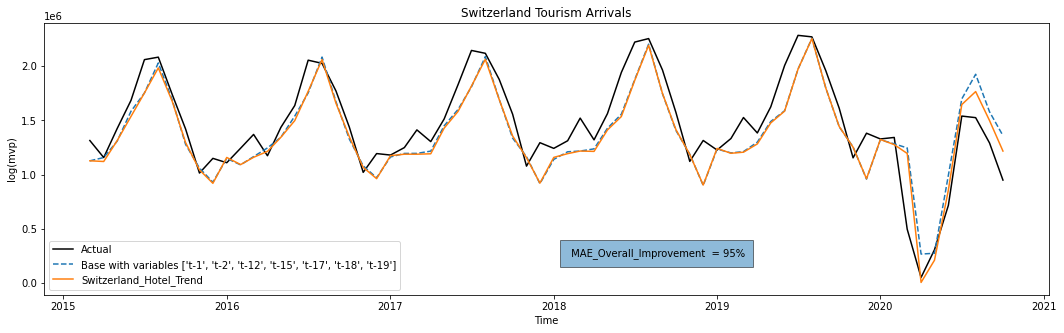

In [94]:
# I plot the result of the increasing size rolling window: It is the exact same graph obtained in the paper
fig,axes = plt.subplots(figsize=(18,5))

axes.plot(Arrivals['Total Arrivals'][start_date_testing:end_date_testing], label = 'Actual',color = 'k')
axes.plot(Baseline_Arrivals_Predictions_1, linestyle='dashed', label='Base with variables {}'.format(lags))
axes.plot(Trends_Arrivals_Predictions_1, label='Switzerland_Hotel_Trend')


plt.text('2018-02-01', 0.25*1e6, ' MAE_Overall_Improvement  = {}%'.format(int((Trend_MAE_1 * 100) /Baseline_MAE_1)), bbox={ 'alpha':0.5, 'pad':8})

plt.xlabel('Time')
plt.ylabel('log(mvp)')
plt.title('Switzerland Tourism Arrivals')
plt.legend()

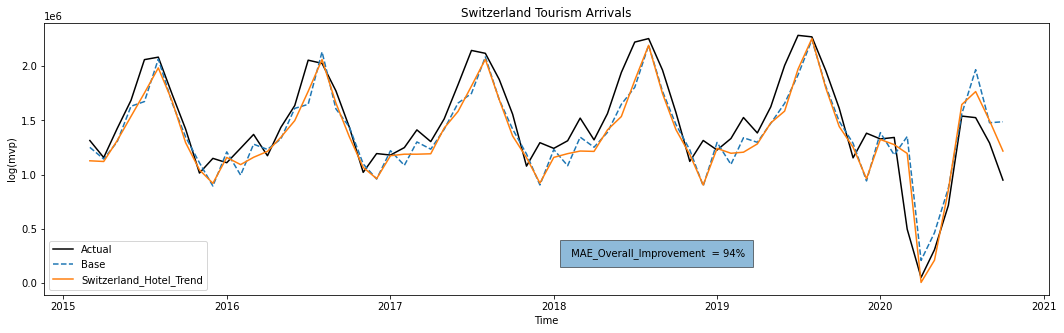

In [70]:
# I plot the result of the increasing size rolling window: It is the exact same graph obtained in the paper
fig,axes = plt.subplots(figsize=(18,5))

axes.plot(Arrivals['Total Arrivals'][start_date_testing:end_date_testing], label = 'Actual',color = 'k')
axes.plot(Baseline_Arrivals_Predictions_2, linestyle='dashed', label='Base')
axes.plot(Trends_Arrivals_Predictions_2, label='Switzerland_Hotel_Trend')


plt.text('2018-02-01', 0.25*1e6, ' MAE_Overall_Improvement  = {}%'.format(int((Trend_MAE_2 * 100) /Baseline_MAE_2)), bbox={ 'alpha':0.5, 'pad':8})

plt.xlabel('Time')
plt.ylabel('log(mvp)')
plt.title('Switzerland Tourism Arrivals')
plt.legend()

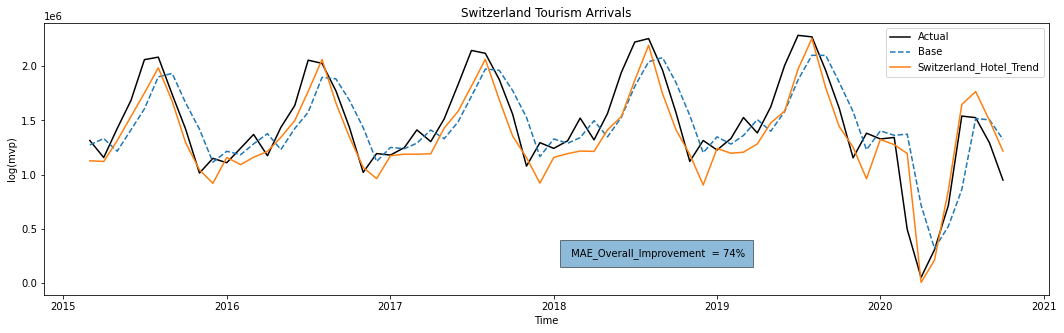

In [71]:
# I plot the result of the increasing size rolling window: It is the exact same graph obtained in the paper
fig,axes = plt.subplots(figsize=(18,5))

axes.plot(Arrivals['Total Arrivals'][start_date_testing:end_date_testing], label = 'Actual',color = 'k')
axes.plot(Baseline_Arrivals_Predictions_3, linestyle='dashed', label='Base')
axes.plot(Trends_Arrivals_Predictions_3, label='Switzerland_Hotel_Trend')


plt.text('2018-02-01', 0.25*1e6, ' MAE_Overall_Improvement  = {}%'.format(int((Trend_MAE_3 * 100) /Baseline_MAE_3)), bbox={ 'alpha':0.5, 'pad':8})

plt.xlabel('Time')
plt.ylabel('log(mvp)')
plt.title('Switzerland Tourism Arrivals')
plt.legend()